<a href="https://colab.research.google.com/github/BurovNV/MyRepo/blob/main/Dim_reduct_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Линейный дискриминантный анализ (LDA) — это классификационный метод, который
так же популярен, как метод уменьшения размерности. 

Метод LDA работает
аналогично анализу главных компонент (РСА): он проецирует пространство признаков
на пространство более низкой размерности. 

Однако в РСА нас интересовали
только те оси компонент, которые максимизируют дисперсию данных, в то время
как в LDA есть дополнительная цель максимизировать различия между классами.

In [ ]:
# импорт
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# даннные
wines = datasets.load_wine()
X = wines.data
y = wines.target
# стандартизация
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# вывод размерности
X_std.shape

(178, 13)

In [ ]:
# экземпляр класса
lda = LDA(n_components=None)
# обучение
lda.fit(X_std, y)  # без 'y' не обучается!
# вывод - сжать можно до двух фичей
# точнее все остальные равны 0, поэтому оставляем две
lda.explained_variance_ratio_

array([0.68747889, 0.31252111])

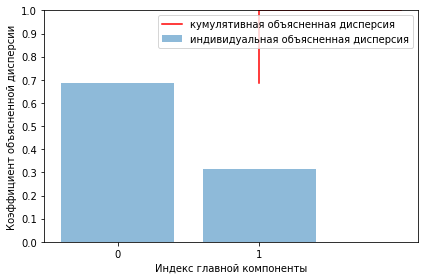

In [ ]:
# вывод графика накопленной дисперсии для принятия решения о точке отсечения
plt.bar(range(len(lda.explained_variance_ratio_)),
        lda.explained_variance_ratio_, 
        alpha=0.5,
        align='center',
        label='индивидуальная объясненная дисперсия')
plt.step(range(1, len(lda.explained_variance_ratio_)+ 1), 
         np.cumsum(lda.explained_variance_ratio_), 
         c='r',
         label='кумулятивная объясненная дисперсия')
plt.ylim(0, 1)
plt.ylabel('Коэффициент объясненной дисперсии')
plt.xlabel('Индекс главной компоненты')
plt.xticks(range(len(lda.explained_variance_ratio_)))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend(loc='best')
plt.tight_layout()
plt.show();

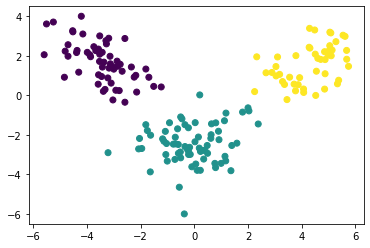

In [ ]:
# двух измерений вместо 13 достаточно
# трансформирование данных
X_lda = lda.transform(X_std)
# печать - теперь данные отлично и линейно разделимы
plt.scatter(X_lda[:, 0],
            X_lda[:, 1],
            c=y)
plt.show()